<a href="https://colab.research.google.com/github/patriani/RNN_LSTM_Tesla_stock/blob/main/ELT575_Semana3_ES119663.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [10]:
from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import pandas as pd

# Primeira configuração da rede
- **Modelo**: RNN configurado com apenas uma célula de LSTM, que por sua vez possui 50 unidades ocultas.
- **Análise**: O modelo representa um erro médio muito pequeno em comparação com a magnitude e a variação dos preços de fechamento (coluna 'Close' do dataset) observados. Nota-se que apesar de os erros (RMSE) serem muito baixos, observa-se que o poder de generalização do modelo pode não ser tão escalável devido o fato do erro de treino ter sido aproximadamente 100 vezes menor que o de teste.

  - **Raíz do Erro Médio Quadrático para Treino: 0.008**
  - **Raíz do Erro Médio Quadrático para Teste: 0.108**

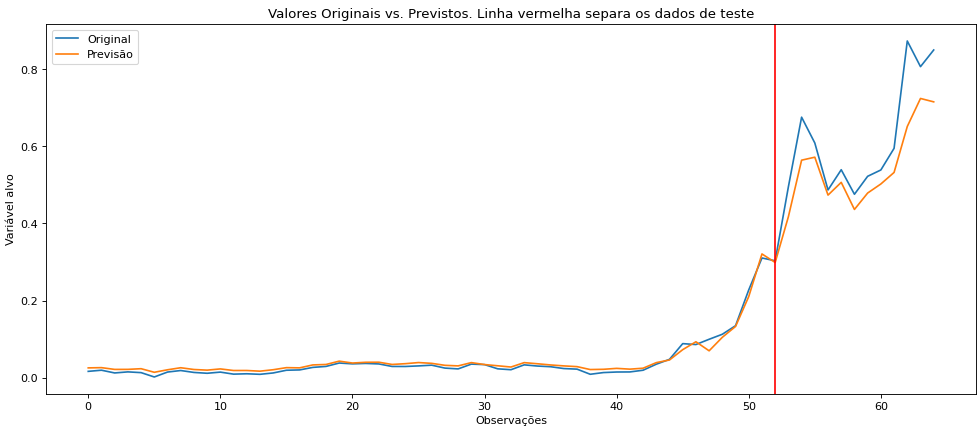


In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
def load_and_prepare_data():

  tesla_stock = 'https://raw.githubusercontent.com/patriani/RNN_LSTM_Tesla_stock/main/tesla_stock_2015_2022.csv'
  df = read_csv(tesla_stock)

  # Only the column 'Open' will be used as independent variables and 'Close' is the column of the dependent variables.
  #df_XY=pd.DataFrame(df, columns=['Open','Close'])
  opening_prices = df['Open'].values

  # Reshape of the target data
  opening_prices_scaled = scaler.fit_transform(opening_prices.reshape(-1, 1))

  # Split into train and test data (80% to train and 20% to test)
  train_size = int(len(opening_prices_scaled) * 0.8)
  train_data = opening_prices_scaled[:train_size]
  test_data = opening_prices_scaled[train_size:]

  return opening_prices,train_data,test_data

opening_prices,train_data,test_data = load_and_prepare_data()

In [12]:
# Prepare the input X and target Y for temporal analysis

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(sequence_length, len(data)):
        sequences.append(data[i-sequence_length:i])
        labels.append(data[i])
    return np.array(sequences), np.array(labels)


time_steps = 50

# Prepating the train data frame
trainX, trainY = create_sequences(train_data, time_steps)

# Prepating the test data frame
testX, testY = create_sequences(test_data, time_steps)

In [13]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    # Parameter return_sequences=True => SimpleRNN layer returns sequences so that the output has the same number of time steps as the input, making it compatible with the second SimpleRNN layer
    model.add(LSTM(hidden_units, input_shape=input_shape,activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),activation=['tanh', 'tanh'])
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, verbose=2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 - 2s - 38ms/step - loss: 0.0011 - val_loss: 0.0058
Epoch 2/50
40/40 - 0s - 10ms/step - loss: 1.3530e-04 - val_loss: 0.0055
Epoch 3/50
40/40 - 1s - 15ms/step - loss: 1.3105e-04 - val_loss: 0.0084
Epoch 4/50
40/40 - 1s - 15ms/step - loss: 1.3601e-04 - val_loss: 0.0058
Epoch 5/50
40/40 - 1s - 17ms/step - loss: 1.0436e-04 - val_loss: 0.0055
Epoch 6/50
40/40 - 1s - 17ms/step - loss: 9.3726e-05 - val_loss: 0.0053
Epoch 7/50
40/40 - 0s - 12ms/step - loss: 9.3543e-05 - val_loss: 0.0092
Epoch 8/50
40/40 - 0s - 7ms/step - loss: 1.0219e-04 - val_loss: 0.0089
Epoch 9/50
40/40 - 0s - 8ms/step - loss: 9.0294e-05 - val_loss: 0.0073
Epoch 10/50
40/40 - 0s - 7ms/step - loss: 8.2692e-05 - val_loss: 0.0094
Epoch 11/50
40/40 - 0s - 7ms/step - loss: 8.0018e-05 - val_loss: 0.0084
Epoch 12/50
40/40 - 0s - 7ms/step - loss: 8.4657e-05 - val_loss: 0.0099
Epoch 13/50
40/40 - 0s - 7ms/step - loss: 8.0797e-05 - val_loss: 0.0108
Epoch 14/50
40/40 - 0s - 7ms/step - loss: 7.4050e-05 - val_loss: 0.0084
Epoch 15/

In [14]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Raíz do Erro Médio Quadrático para Treino: 0.006
Raíz do Erro Médio Quadrático para Teste: 0.094


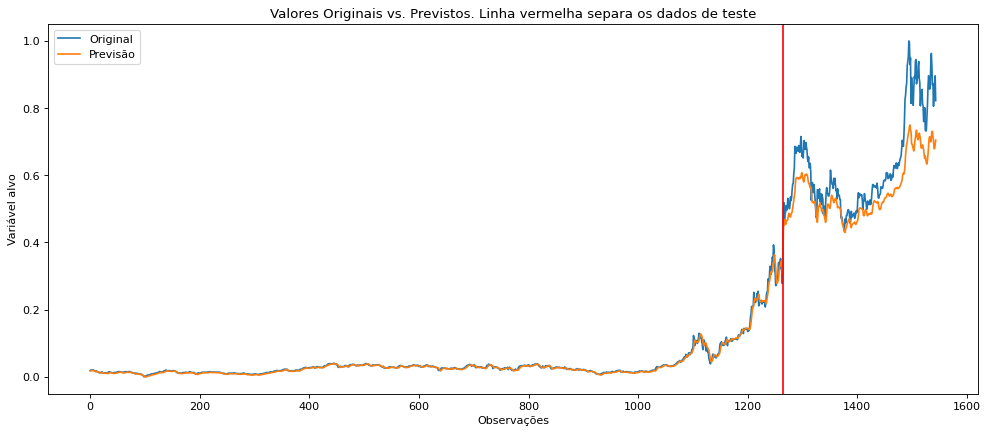

In [15]:

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Variável alvo')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')

plot_result(trainY, testY, train_predict, test_predict)

# Segunda análise
- **Modelo**: baseado no primeiro experimento, com adição de uma camada LSTM
- **Análise**: A adição e conexão de uma camada LSTM já contribuiu levemente na generalização do modelo, assim como aumentou a precisão dele devido a redução do RMSE:
  - **Raíz do Erro Médio Quadrático para Treino: 0.007**
  - **Raíz do Erro Médio Quadrático para Teste: 0.090**

  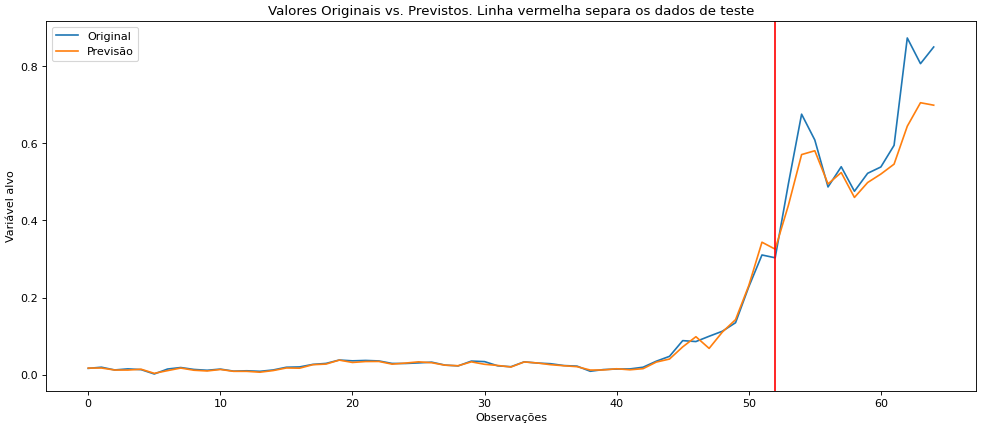

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 - 2s - 57ms/step - loss: 8.1086e-04 - val_loss: 0.0058
Epoch 2/50
40/40 - 0s - 9ms/step - loss: 1.2077e-04 - val_loss: 0.0119
Epoch 3/50
40/40 - 1s - 15ms/step - loss: 1.2227e-04 - val_loss: 0.0079
Epoch 4/50
40/40 - 0s - 9ms/step - loss: 1.1644e-04 - val_loss: 0.0052
Epoch 5/50
40/40 - 0s - 9ms/step - loss: 1.3070e-04 - val_loss: 0.0099
Epoch 6/50
40/40 - 1s - 16ms/step - loss: 1.3056e-04 - val_loss: 0.0101
Epoch 7/50
40/40 - 0s - 9ms/step - loss: 9.4298e-05 - val_loss: 0.0072
Epoch 8/50
40/40 - 1s - 16ms/step - loss: 1.1386e-04 - val_loss: 0.0092
Epoch 9/50
40/40 - 1s - 15ms/step - loss: 1.1503e-04 - val_loss: 0.0110
Epoch 10/50
40/40 - 1s - 16ms/step - loss: 9.1512e-05 - val_loss: 0.0113
Epoch 11/50
40/40 - 1s - 20ms/step - loss: 8.4428e-05 - val_loss: 0.0078
Epoch 12/50
40/40 - 1s - 14ms/step - loss: 8.1383e-05 - val_loss: 0.0093
Epoch 13/50
40/40 - 1s - 15ms/step - loss: 7.1323e-05 - val_loss: 0.0099
Epoch 14/50
40/40 - 0s - 12ms/step - loss: 8.7644e-05 - val_loss: 0.0063
Ep

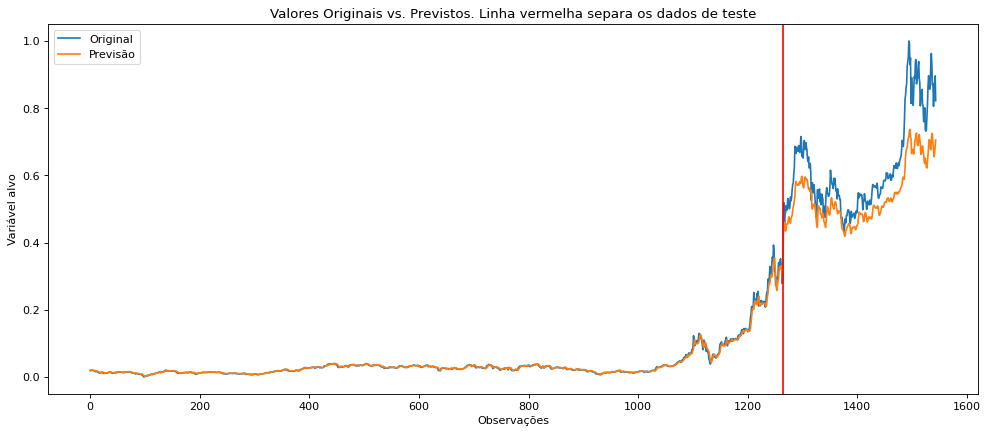

In [16]:

df_XY_02,train_data_02,test_data_02 = load_and_prepare_data()

# Same value of the previous test
time_steps = 50

# Prepating the train data frame
trainX_02, trainY_02 = create_sequences(train_data_02, time_steps)

# Prepating the test data frame
testX_02, testY_02 = create_sequences(test_data_02, time_steps)

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    # Parameter return_sequences=True => SimpleRNN layer returns sequences so that the output has the same number of time steps as the input, making it compatible with the second SimpleRNN layer
    model.add(LSTM(hidden_units, input_shape=input_shape,activation=activation[0],return_sequences=True))
    model.add(LSTM(hidden_units, activation=activation[1]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model_02 = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),activation=['tanh', 'tanh'])
history = model_02.fit(trainX_02, trainY_02, validation_data=(testX_02, testY_02), epochs=50, batch_size=32, verbose=2)


# make predictions
train_predict_02 = model_02.predict(trainX_02)
test_predict_02 = model_02.predict(testX_02)
# Mean square error
print_error(trainY_02, testY_02, train_predict_02, test_predict_02)


# predicting
predicted_02 = model_02.predict(trainX_02)
predicted_prices_02 = scaler.inverse_transform(predicted_02)
actual_prices_02 = scaler.inverse_transform(testY.reshape(-1, 1))

# Plot the result
plot_result(trainY_02, testY_02, train_predict_02, test_predict_02)

# Terceira análise
- **Modelo:** baseado no modelo anterior, tendo camadas de Dropout de 20% incluídas
- **Análise:** Observa-se que as métricas de erro não foram consideravelmente menores do que o exemplo anterior apresentou. Presumi-se que a técnica de dropout não contribui diretamente na melhora de performance de modelos pequenos, mas que é uma técnica promissora para redes mais profundas (com mais camdas), assim como será observado na próxima análise (quarta análise).
  - **Raíz do Erro Médio Quadrático para Treino: 0.008**
  -** Raíz do Erro Médio Quadrático para Teste: 0.085**

  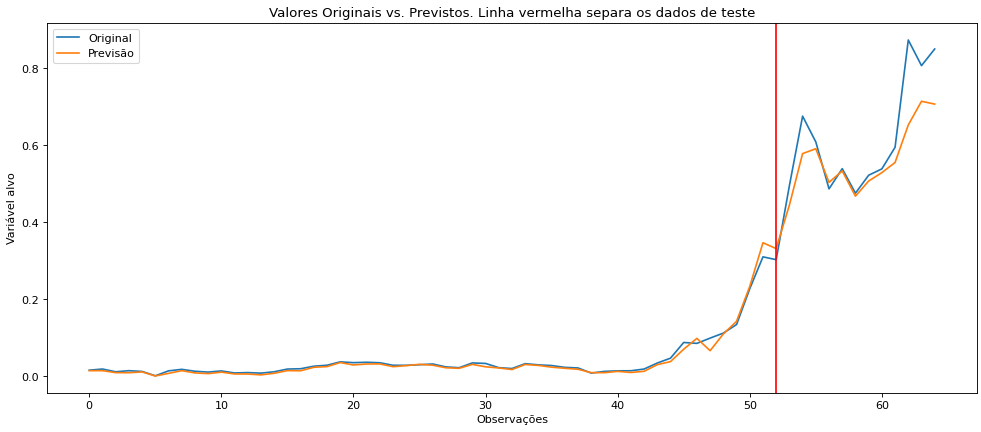


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 - 3s - 76ms/step - loss: 0.0011 - val_loss: 0.0087
Epoch 2/50
40/40 - 0s - 10ms/step - loss: 1.6950e-04 - val_loss: 0.0052
Epoch 3/50
40/40 - 0s - 9ms/step - loss: 1.9089e-04 - val_loss: 0.0205
Epoch 4/50
40/40 - 0s - 9ms/step - loss: 1.6734e-04 - val_loss: 0.0055
Epoch 5/50
40/40 - 0s - 10ms/step - loss: 1.7147e-04 - val_loss: 0.0067
Epoch 6/50
40/40 - 0s - 10ms/step - loss: 1.5808e-04 - val_loss: 0.0182
Epoch 7/50
40/40 - 0s - 9ms/step - loss: 1.4802e-04 - val_loss: 0.0138
Epoch 8/50
40/40 - 1s - 16ms/step - loss: 1.9854e-04 - val_loss: 0.0284
Epoch 9/50
40/40 - 1s - 16ms/step - loss: 1.3980e-04 - val_loss: 0.0094
Epoch 10/50
40/40 - 0s - 10ms/step - loss: 1.4143e-04 - val_loss: 0.0065
Epoch 11/50
40/40 - 0s - 10ms/step - loss: 1.3939e-04 - val_loss: 0.0051
Epoch 12/50
40/40 - 0s - 9ms/step - loss: 1.6111e-04 - val_loss: 0.0137
Epoch 13/50
40/40 - 1s - 16ms/step - loss: 1.3182e-04 - val_loss: 0.0092
Epoch 14/50
40/40 - 1s - 15ms/step - loss: 1.1603e-04 - val_loss: 0.0150
Epoch 

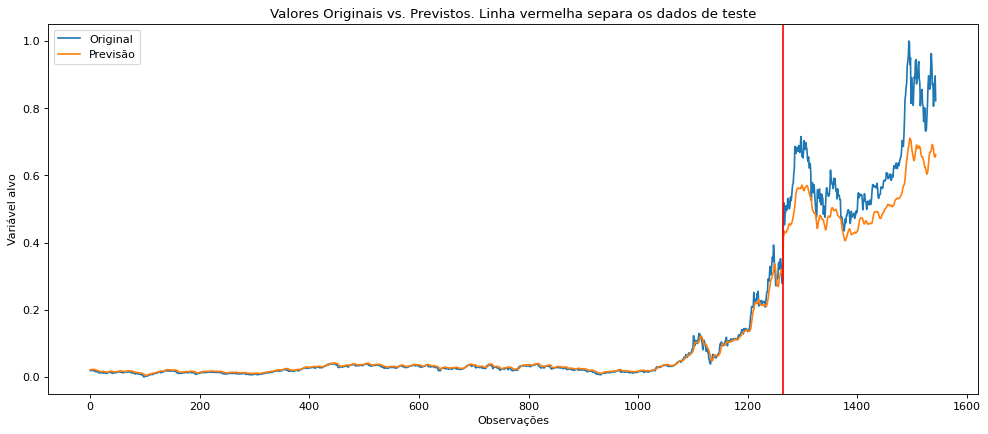

In [17]:

df_XY_03,train_data_03,test_data_03 = load_and_prepare_data()

# Same value of the previous test
time_steps = 50

# Prepating the train data frame
trainX_03, trainY_03 = create_sequences(train_data_03, time_steps)

# Prepating the test data frame
testX_03, testY_03 = create_sequences(test_data_03, time_steps)

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    # Parameter return_sequences=True => SimpleRNN layer returns sequences so that the output has the same number of time steps as the input, making it compatible with the second SimpleRNN layer
    model.add(LSTM(hidden_units, input_shape=input_shape,activation=activation[0],return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hidden_units, activation=activation[1]))
    model.add(Dropout(0.2))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model_03 = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),activation=['tanh', 'tanh'])
history = model_03.fit(trainX_03, trainY_03, validation_data=(testX_03, testY_03), epochs=50, batch_size=32, verbose=2)


# make predictions
train_predict_03 = model_03.predict(trainX_03)
test_predict_03 = model_03.predict(testX_03)
# Mean square error
print_error(trainY_03, testY_03, train_predict_03, test_predict_03)

# Plot the result
plot_result(trainY_03, testY_03, train_predict_03, test_predict_03)

# Quarta análise
- modelo04: 4 blocos de LSTM, sendo que após cada um dos blocos foi inserido um Dropout de 20%

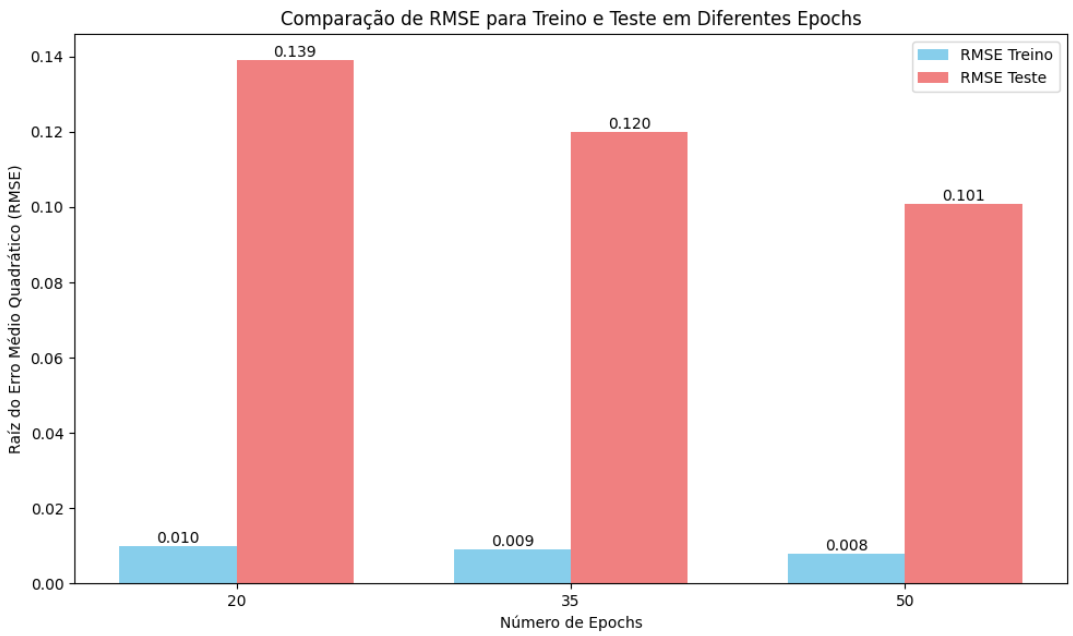

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 - 4s - 97ms/step - loss: 8.3321e-04 - val_loss: 0.0107
Epoch 2/50
40/40 - 1s - 14ms/step - loss: 2.5853e-04 - val_loss: 0.0178
Epoch 3/50
40/40 - 1s - 15ms/step - loss: 3.0468e-04 - val_loss: 0.0310
Epoch 4/50
40/40 - 1s - 13ms/step - loss: 1.9898e-04 - val_loss: 0.0091
Epoch 5/50
40/40 - 1s - 16ms/step - loss: 3.0828e-04 - val_loss: 0.0238
Epoch 6/50
40/40 - 1s - 13ms/step - loss: 2.2635e-04 - val_loss: 0.0084
Epoch 7/50
40/40 - 1s - 13ms/step - loss: 2.7165e-04 - val_loss: 0.0155
Epoch 8/50
40/40 - 1s - 15ms/step - loss: 2.4077e-04 - val_loss: 0.0183
Epoch 9/50
40/40 - 1s - 14ms/step - loss: 1.9189e-04 - val_loss: 0.0088
Epoch 10/50
40/40 - 1s - 21ms/step - loss: 1.8689e-04 - val_loss: 0.0223
Epoch 11/50
40/40 - 1s - 28ms/step - loss: 2.2184e-04 - val_loss: 0.0454
Epoch 12/50
40/40 - 1s - 27ms/step - loss: 2.3382e-04 - val_loss: 0.0236
Epoch 13/50
40/40 - 1s - 13ms/step - loss: 1.9826e-04 - val_loss: 0.0119
Epoch 14/50
40/40 - 1s - 14ms/step - loss: 1.6033e-04 - val_loss: 0.011

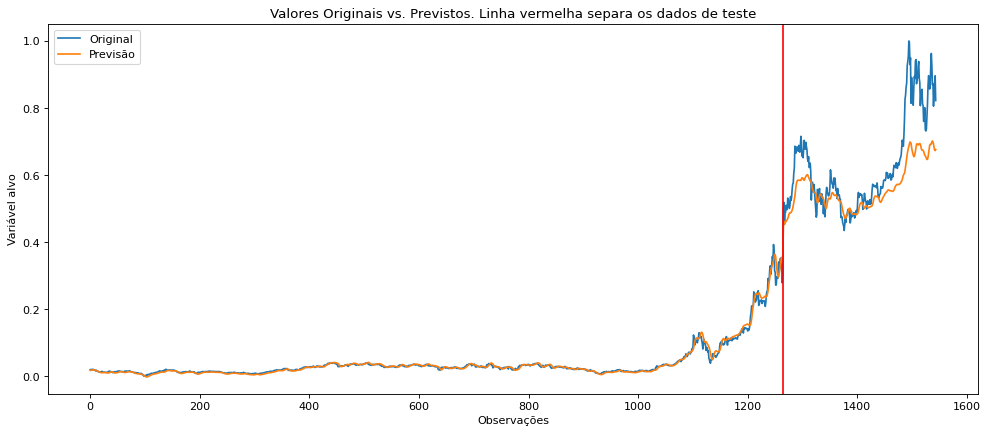

In [18]:

df_XY_04,train_data_04,test_data_04 = load_and_prepare_data()

# Same value of the previous test
time_steps = 50

# Prepating the train data frame
trainX_04, trainY_04 = create_sequences(train_data_04, time_steps)

# Prepating the test data frame
testX_04, testY_04 = create_sequences(test_data_04, time_steps)

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    # Parameter return_sequences=True => SimpleRNN layer returns sequences so that the output has the same number of time steps as the input, making it compatible with the second SimpleRNN layer
    model.add(LSTM(hidden_units, input_shape=input_shape,activation=activation[0],return_sequences=True))
    model.add(LSTM(hidden_units, activation=activation[1],return_sequences=True))
    model.add(LSTM(hidden_units, activation=activation[1],return_sequences=True))
    model.add(LSTM(hidden_units, activation=activation[1]))
    model.add(Dropout(0.2))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model_04 = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),activation=['tanh', 'tanh'])
history = model_04.fit(trainX_04, trainY_04, validation_data=(testX_04, testY_04), epochs=50, batch_size=32, verbose=2)

# make predictions
train_predict_04 = model_04.predict(trainX_04)
test_predict_04 = model_04.predict(testX_04)
# Mean square error
print_error(trainY_04, testY_04, train_predict_04, test_predict_04)

# Plot the result
plot_result(trainY_04, testY_04, train_predict_04, test_predict_04)



# Apêndice
 - Exemplo de como foi gerado o gráfico de barras para apresentação das análises

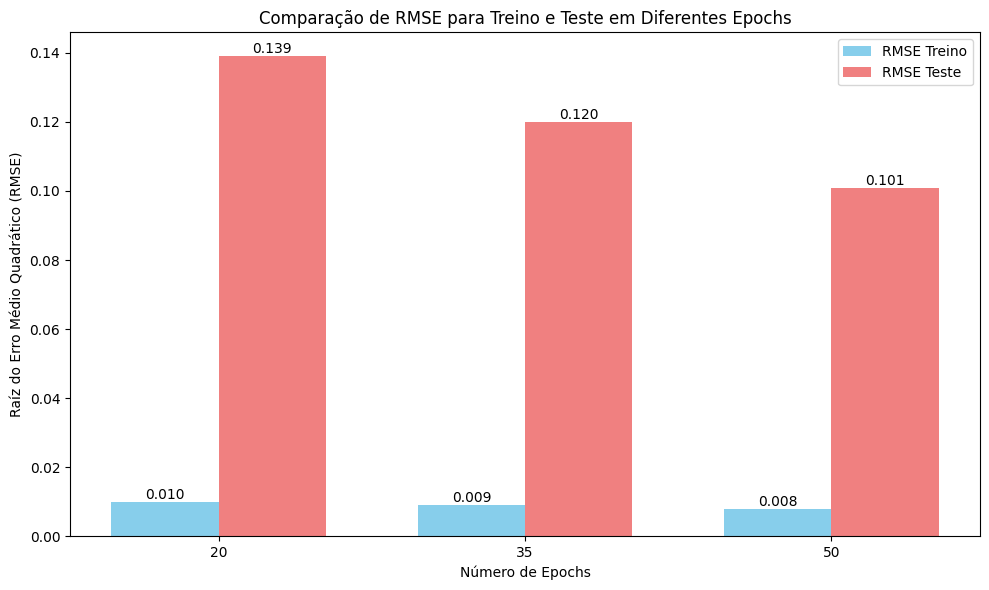

In [19]:
# epochs=20
# Raíz do Erro Médio Quadrático para Treino: 0.010
# Raíz do Erro Médio Quadrático para Teste: 0.139
# epochs=35
# Raíz do Erro Médio Quadrático para Treino: 0.009
# Raíz do Erro Médio Quadrático para Teste: 0.120
# epochs=50
# Raíz do Erro Médio Quadrático para Treino: 0.008
# Raíz do Erro Médio Quadrático para Teste: 0.101

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Provided data
epochs = [20, 35, 50]
rmse_train = [0.010, 0.009, 0.008]
rmse_test = [0.139, 0.120, 0.101]

# Create a DataFrame
data = {
    'Epochs': epochs,
    'RMSE Treino': rmse_train,
    'RMSE Teste': rmse_test
}
df_results = pd.DataFrame(data)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(epochs))

bar1 = ax.bar(index, df_results['RMSE Treino'], bar_width, label='RMSE Treino', color='skyblue')
bar2 = ax.bar(index + bar_width, df_results['RMSE Teste'], bar_width, label='RMSE Teste', color='lightcoral')

ax.set_xlabel('Número de Epochs')
ax.set_ylabel('Raíz do Erro Médio Quadrático (RMSE)')
ax.set_title('Comparação de RMSE para Treino e Teste em Diferentes Epochs')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_results['Epochs'])
ax.legend()

# Add value labels on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                '%.3f' % height,
                ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()
